In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


data = pd.read_csv('data/weather_data_hochiminh_2020.csv', index_col='time', parse_dates=['time'])
data.drop(columns=['prcp','snow','wpgt','tsun'], inplace= True)

print(data.dtypes)
data.head(10)

tavg    float64
tmin      int64
tmax    float64
wdir      int64
wspd    float64
pres    float64
dtype: object


,tavg,tmin,tmax,wdir,wspd,pres
time,,,,,,
2020-01-01,28.6,22,35.0,47,10.4,1014.0
2020-01-02,28.9,23,35.0,70,9.8,1014.2
2020-01-03,28.6,24,34.0,38,7.2,1013.1
2020-01-04,27.4,24,33.0,43,6.6,1011.4
2020-01-05,27.3,23,33.0,12,6.7,1011.5
2020-01-06,28.6,23,34.0,54,7.1,1011.6
2020-01-07,29.4,24,35.0,98,7.9,1010.6
2020-01-08,28.6,25,35.0,85,8.4,1010.3
2020-01-09,28.7,24,35.0,104,8.6,1009.2


In [7]:
data.isnull().sum()

tavg    0
tmin    0
tmax    0
wdir    0
wspd    0
pres    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,tavg,tmin,tmax,wdir,wspd,pres
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,28.560109,25.131148,33.332514,179.770492,9.429781,1008.736885
std,1.412486,1.585642,1.936260,92.925552,3.130848,2.093782
min,25.000000,21.000000,27.000000,4.000000,4.100000,1003.200000
25%,27.600000,24.000000,32.000000,112.250000,7.000000,1007.300000
50%,28.400000,25.000000,33.000000,183.000000,8.800000,1008.800000
75%,29.500000,26.000000,35.000000,254.000000,11.600000,1010.000000
max,32.000000,30.000000,38.000000,358.000000,21.500000,1014.600000


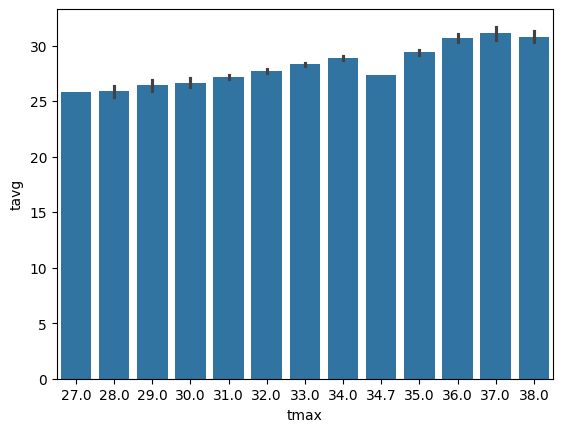

In [14]:
sns.barplot(x=data['tmax'], y = data['tavg'])

plt.show()

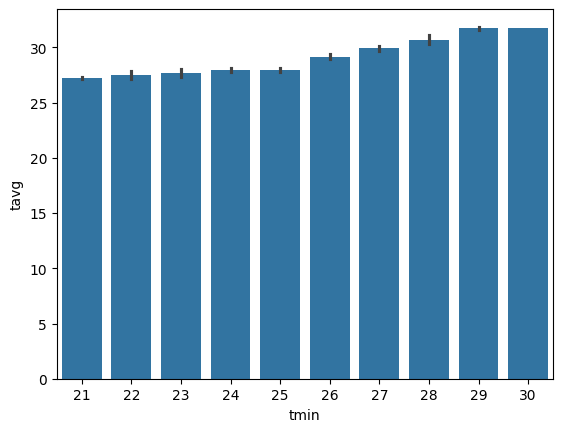

In [15]:
sns.barplot(x=data['tmin'], y = data['tavg'])

plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['pres_Encoder'] = label_encoder.fit_transform(data['pres'])
data['wdir_Encoder'] = label_encoder.fit_transform(data['wdir'])
data['wspd_Encoder'] = label_encoder.fit_transform(data['wspd'])

correlation_matrix = data[["tavg","tmin","tmax","pres_Encoder","wdir_Encoder","wspd_Encoder"]].corr()

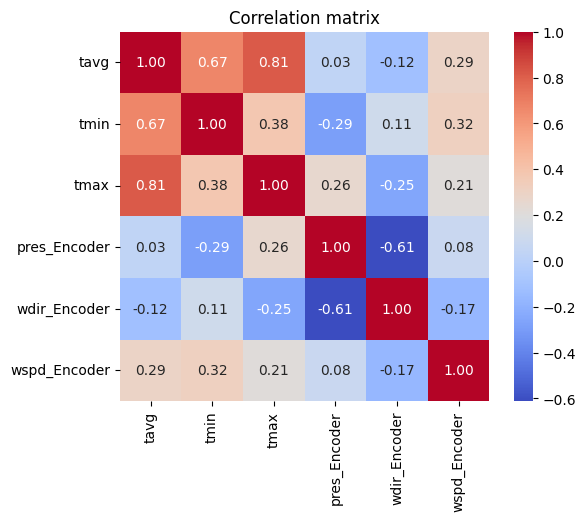

In [22]:
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Correlation matrix')

plt.show()

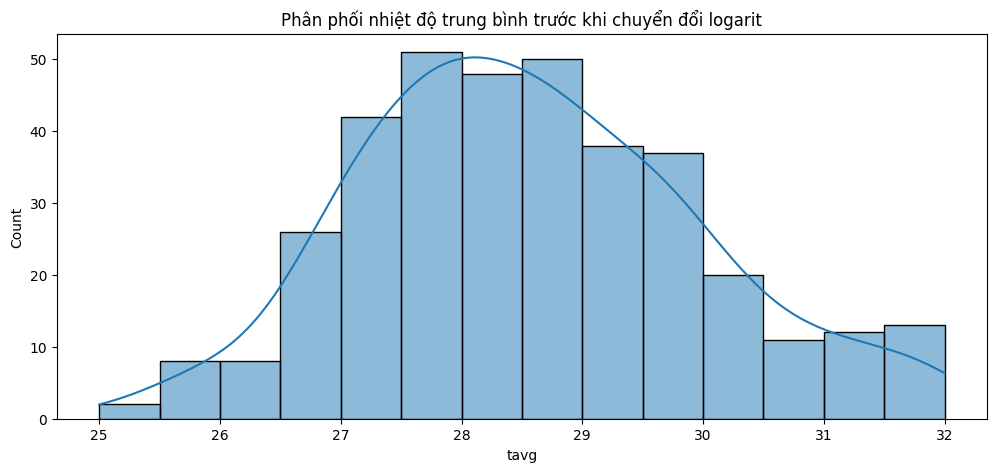

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(data['tavg'], kde= True)
plt.title('Phân phối nhiệt độ trung bình trước khi chuyển đổi logarit')
plt.show()

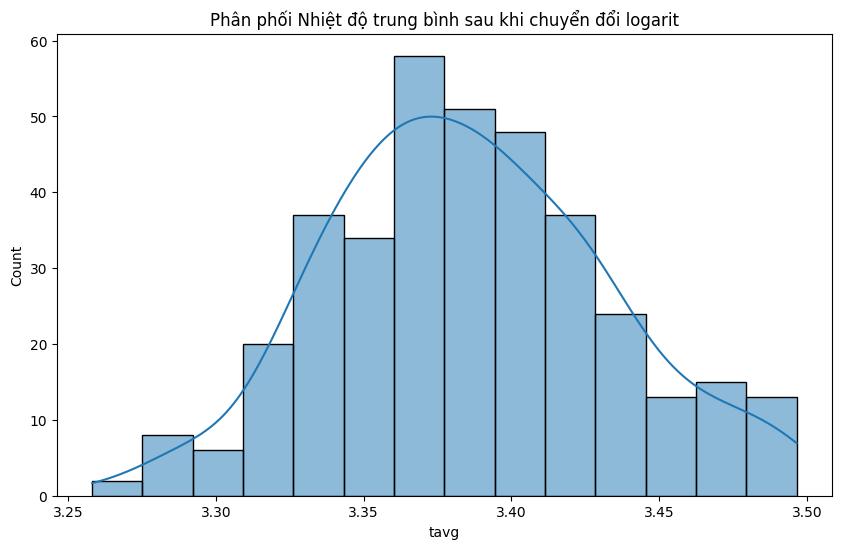

In [24]:
data['tavg'] = np.log1p(data['tavg'])

plt.figure(figsize=(10,6))
sns.histplot(data['tavg'], kde=True)
plt.title('Phân phối Nhiệt độ trung bình sau khi chuyển đổi logarit')
plt.show()

In [40]:
X= data[['pres','tmin','tmax','wdir','wspd']]

Y = data['tavg']

numerical_cols =  ['pres','tmin','tmax','wdir','wspd']

In [41]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X[numerical_cols])

In [42]:
X_norm_df = pd.DataFrame(X_norm, columns=numerical_cols)

X_final = pd.concat([X_norm_df.reset_index(drop=True)], axis=1)
X_final.shape

(366, 5)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y, test_size=0.20, random_state=4)

In [44]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train,Y_train)
print(Linear_regression)

LinearRegression()


In [45]:
b_norm = Linear_regression.intercept_
w_norm = Linear_regression.coef_

print(f"tham số của mô hình: W: {w_norm}, b: {b_norm}")

tham số của mô hình: W: [-1.00954796e-03  1.79116422e-02  3.16177726e-02 -2.27433542e-06
  1.84636550e-03], b: 3.386804059096708


In [46]:
y_pred = Linear_regression.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
print(f"Tổng bình phương sai số: {mse}")

r2 = r2_score(Y_test,y_pred)
print(f'hệ số xác định R2: {r2}')

Tổng bình phương sai số: 0.00041033561061667057
hệ số xác định R2: 0.8361397486013662


In [48]:
sgdr=SGDRegressor(max_iter=1000)
sgdr.fit(X_train,Y_train)
print(sgdr)

SGDRegressor()


In [50]:
y_pred=sgdr.predict(X_test)

In [51]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Tổng bình phương sai số: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(Y_test, y_pred)
print(f"Hệ số xác định (R²): {r2}")

Tổng bình phương sai số: 0.0003837413901920066
Hệ số xác định (R²): 0.8467596790480246
